Task 1:
Handwritten Digit Recognition



In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

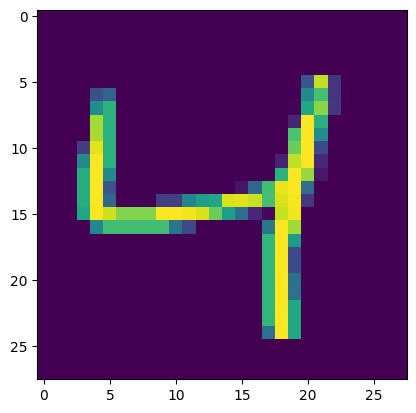

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2713 - accuracy: 0.9208 - val_loss: 0.1449 - val_accuracy: 0.9567
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1172 - accuracy: 0.9650 - val_loss: 0.1155 - val_accuracy: 0.9642
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0790 - accuracy: 0.9758 - val_loss: 0.1035 - val_accuracy: 0.9712
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0907 - val_accuracy: 0.9739
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0978 - val_accuracy: 0.9706
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0974 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.1146 - val_accurac

In [12]:
model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


array([[1.8157670e-11, 1.6782062e-10, 3.0847866e-10, ..., 9.9999982e-01,
        7.4707325e-09, 3.6850732e-08],
       [3.9286945e-11, 9.0801572e-10, 9.9999994e-01, ..., 1.1673363e-14,
        2.7523303e-10, 4.5606403e-16],
       [4.8836353e-07, 9.9969840e-01, 3.8630340e-05, ..., 1.1937547e-04,
        1.0640038e-04, 4.5882516e-06],
       ...,
       [1.3258811e-15, 5.3797326e-13, 1.4013127e-15, ..., 3.7870902e-07,
        6.1752603e-10, 1.2801529e-07],
       [4.9412321e-14, 7.5386766e-14, 2.9990255e-19, ..., 2.7828605e-15,
        7.8275137e-09, 1.4698864e-15],
       [4.2461468e-12, 7.9042784e-14, 1.2321508e-11, ..., 1.2337590e-19,
        2.5768485e-12, 1.5660936e-17]], dtype=float32)

In [13]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
y_pred=y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9786

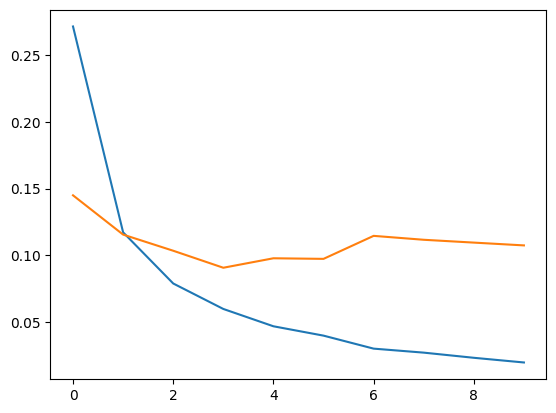

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

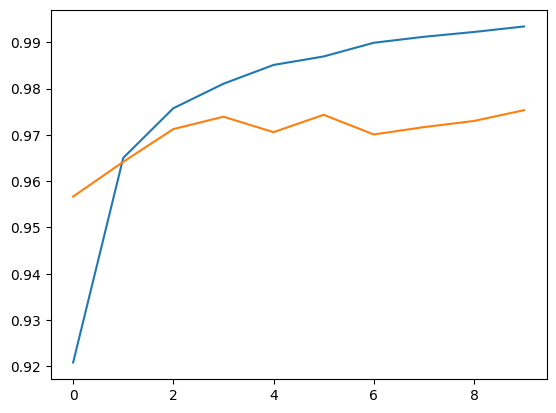

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

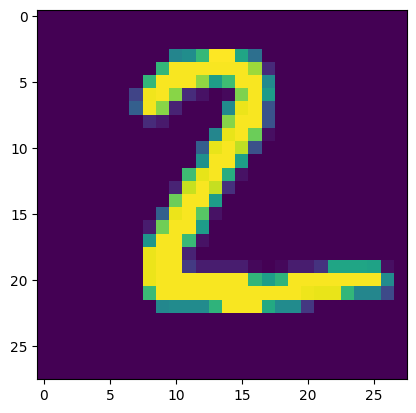

In [18]:
plt.imshow(X_test[1])

In [19]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([2])